In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

import re
import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, GRU
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

In [ ]:
!pip install contractions

     |████████████████████████████████| 287 kB 5.7 MB/s 
     |████████████████████████████████| 106 kB 41.1 MB/s 


In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
import unicodedata
from tqdm import tqdm
from contractions import contractions_dict
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from string import ascii_lowercase
from sklearn.metrics import confusion_matrix, f1_score,precision_score, recall_score
import matplotlib.pyplot 

In [ ]:
import nltk
import contractions
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tensorflow.keras.preprocessing.text import one_hot

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/k-디지털-품질재단/미니프로젝트2/'
test = pd.read_csv( path + 'test.csv')
train = pd.read_csv( path + 'train.csv')
submit = pd.read_csv( path + 'submit.csv')

In [ ]:
VOCAB_SIZE = 5000

In [ ]:
def data_clean(dt):

  dt          = dt.fillna('')
  dt["total"] = dt['title'] + " " + dt["author"]  
  return dt

In [ ]:
def text_cleaning(df):

    ps = PorterStemmer()
    corpus = []
    for i in range(len(df)):
        m = re.sub("[^a-zA-Z]", " ", df["total"][i])
        m = m.lower()
        m = m.split()
        m = [ps.stem(word) for word in m if not word in stopwords.words('english')]
        clean_text = " ".join(m)
        corpus.append(clean_text)
        
    return corpus

In [ ]:
def onehot(corpus, VOCAB_SIZE = 5000):
  return [one_hot(words, VOCAB_SIZE) for words in corpus]

In [ ]:
def padding(onehot_text) :
  return np.array(pad_sequences(onehot_text, padding="pre", maxlen = 25))

In [ ]:
def get_label(df):
  return np.array(df["label"])

In [ ]:
def make_clean(df) :

  corpus = data_clean(df)
  corpus = text_cleaning(corpus)
  corpus = onehot(corpus)
  corpus = padding(corpus)
  return   corpus

In [ ]:
make_clean(train)[0]

In [ ]:
def get_data() :

  path = '/content/drive/MyDrive/k-디지털-품질재단/미니프로젝트2/'
  test   = pd.read_csv(path + 'test.csv'  )
  train  = pd.read_csv(path + 'train.csv' )
  submit = pd.read_csv(path + 'submit.csv')

  x = np.array(list(make_clean(train)) + list(make_clean(test )))
  y = np.array(list(get_label(train )) + list(get_label(submit)))
  return train_test_split(x, y, test_size = 0.2, random_state = 1234)

In [ ]:
def save_data(path, train_x, test_x, train_y, test_y) :
  np.save(path + 'train_x', train_x)
  np.save(path + 'test_x' , test_x )
  np.save(path + 'train_y', train_x)
  np.save(path + 'test_y' , test_x )

In [ ]:
train_x, test_x, train_y, test_y = get_data()

save_data(path, train_x, test_x, train_y, test_y)

# 평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, \
                             recall_score, f1_score, roc_curve, \
                             accuracy_score, roc_auc_score
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [ ]:
def show_metrics(y_pred, y_actual) :
  print('Accuracy  :',  accuracy_score(y_pred, y_actual))
  print('Precision :', precision_score(y_pred, y_actual))
  print('Recall    :',    recall_score(y_pred, y_actual))
  print('F1-score  :',        f1_score(y_pred, y_actual))
  print('Auc       :',   roc_auc_score(y_pred, y_actual))

In [ ]:
def show_confusion_matrix(y_pred, y_actual, path, model_name) :
  fig = plt.figure(figsize = (10, 8))
  plt.title(model_name + ' Confusion Matrix')
  # annot : cell에 숫자 표현 유무, fmt : 숫자 형태(d : 정수)
  # cmap : color, cbar : color bar 유무
  sns.heatmap(confusion_matrix(y_pred, y_actual), annot = True, fmt = 'd', 
              cbar = False, cmap = sns.color_palette("Purples",2),
              xticklabels = ['Positive', 'Negative'],
              yticklabels = ['Positive', 'Negative'])
  plt.xlabel('Actuals')
  plt.ylabel('Predicted')
  plt.savefig(path + model_name +'_confusion_matrix.png', dpi = 300)
  plt.show()

In [ ]:
def show_roc_curve(y_pred, y_actual, path, model_name) :

  fig = plt.figure(figsize = (10, 8))
  FPR, TPR, n = roc_curve(y_actual, y_pred)
  
  plt.plot(FPR, TPR)
  plt.plot([0, 1], [0, 1])
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  
  plt.title(model_name + ' ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.savefig(path + model_name + '_ROC_curve.png', dpi = 300)
  plt.show()

# Deep_Learning Model

## RNN : 0.8869

In [ ]:
from tensorflow.keras.layers import  Embedding

model2 = Sequential()
model2.add(Embedding(30000, 30))
model2.add(SimpleRNN(20))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer = Adam(lr = 0.01), 
              loss='binary_crossentropy', 
              metrics=['acc'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          900000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                1020      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 901,041
Trainable params: 901,041
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model2.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
650/650 [==============================] - 15s 21ms/step - loss: 0.2773 - acc: 0.9079
Epoch 2/10
650/650 [==============================] - 14s 22ms/step - loss: 0.2288 - acc: 0.9248
Epoch 3/10
650/650 [==============================] - 14s 22ms/step - loss: 0.2045 - acc: 0.9304
Epoch 4/10
650/650 [==============================] - 14s 22ms/step - loss: 0.1881 - acc: 0.9335
Epoch 5/10
650/650 [==============================] - 20s 31ms/step - loss: 0.1786 - acc: 0.9373
Epoch 6/10
650/650 [==============================] - 22s 33ms/step - loss: 0.1821 - acc: 0.9354
Epoch 7/10
650/650 [==============================] - 24s 36ms/step - loss: 0.1684 - acc: 0.9405
Epoch 8/10
650/650 [==============================] - 20s 31ms/step - loss: 0.1700 - acc: 0.9388
Epoch 9/10
650/650 [==============================] - 19s 30ms/step - loss: 0.1671 - acc: 0.9397
Epoch 10/10
650/650 [==============================] - 13s 20ms/step - loss: 0.1694 - acc: 0.9393


In [ ]:
model2.evaluate(test_x, test_y)

163/163 [==============================] - 1s 3ms/step - loss: 0.3569 - acc: 0.8869


[0.35685592889785767, 0.88692307472229]

In [ ]:
y_pred = (model2.predict(test_x) > 0.5).astype("int32")

Accuracy  : 0.8869230769230769
Precision : 0.8838808250572956
Recall    : 0.8906851424172441
F1-score  : 0.8872699386503068
Auc       : 0.8869259685952477


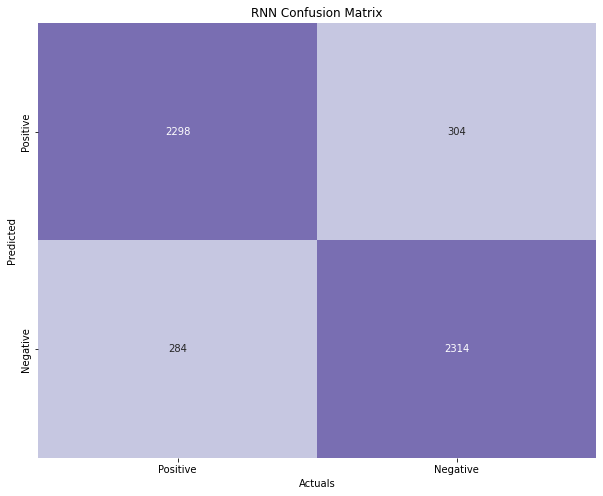

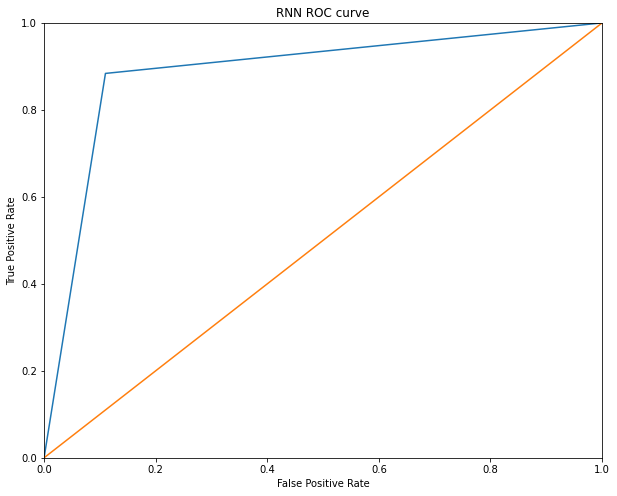

In [ ]:
show_metrics(y_pred, test_y)
show_confusion_matrix(y_pred, test_y, path2, 'RNN')
show_roc_curve(y_pred, test_y, path2, 'RNN')

In [ ]:
path2 = '/content/drive/MyDrive/k-디지털-품질재단/미니프로젝트2/realreal/'

In [ ]:
model2.save(path2 + 'RNN.h5')

## LSTM : 0.8788

In [ ]:
def build_model():
    # model structure
    model = tf.keras.Sequential([
        L.Embedding(VOCAB_SIZE, 40, input_length = 25),
        L.Dropout(0.3),
        L.LSTM(100),
        L.Dropout(0.3),
        L.Dense(64, activation = "relu"),
        L.Dropout(0.3),
        L.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(optimizer="adam", loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = tf.metrics.BinaryAccuracy()
                 )
    
    return model

In [ ]:
news_classifier = build_model()
news_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 25, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint("news_classifier.h5", monitor = "val_loss", save_best_only=True),
                tf.keras.callbacks.CSVLogger("training.log"),
                tf.keras.callbacks.EarlyStopping(patience=5),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
               ]

In [ ]:
history1 = news_classifier.fit(
    train_x,
    train_y,
    epochs = 25,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = my_callbacks
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 16s 109ms/step - loss: 0.4080 - binary_accuracy: 0.8172 - val_loss: 0.2612 - val_binary_accuracy: 0.9142 - lr: 0.0010
Epoch 2/25
130/130 [==============================] - 15s 114ms/step - loss: 0.2550 - binary_accuracy: 0.9163 - val_loss: 0.2569 - val_binary_accuracy: 0.9180 - lr: 0.0010
Epoch 3/25
130/130 [==============================] - 15s 112ms/step - loss: 0.2286 - binary_accuracy: 0.9233 - val_loss: 0.2685 - val_binary_accuracy: 0.9079 - lr: 0.0010
Epoch 4/25
130/130 [==============================] - 14s 108ms/step - loss: 0.2085 - binary_accuracy: 0.9307 - val_loss: 0.2898 - val_binary_accuracy: 0.9026 - lr: 0.0010
Epoch 5/25
130/130 [==============================] - 8s 63ms/step - loss: 0.1913 - binary_accuracy: 0.9347 - val_loss: 0.3002 - val_binary_accuracy: 0.8954 - lr: 0.0010
Epoch 6/25
130/130 [==============================] - 8s 63ms/step - loss: 0.1731 - binary_accuracy: 0.9391 - val_loss: 0.3243 - val_binary_accuracy: 0.8

In [ ]:
news_classifier.evaluate(test_x, test_y)

163/163 [==============================] - 1s 9ms/step - loss: 0.4168 - binary_accuracy: 0.8788


[0.416820764541626, 0.8788461685180664]

In [ ]:
y_pred = (news_classifier.predict(test_x) > 0.5).astype("int32")

Accuracy  : 0.8788461538461538
Precision : 0.8762414056531703
Recall    : 0.8823076923076923
F1-score  : 0.8792640858566501
Auc       : 0.8788461538461539


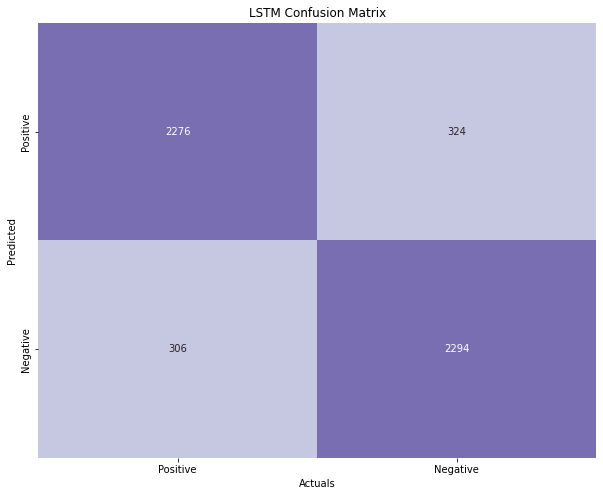

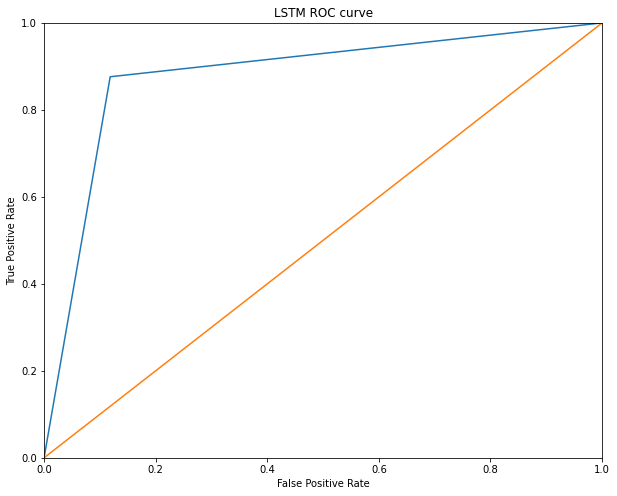

In [ ]:
show_metrics(y_pred, test_y)
show_confusion_matrix(y_pred, test_y, path2, 'LSTM')
show_roc_curve(y_pred, test_y, path2, 'LSTM')

In [ ]:
news_classifier.save(path2 + 'LSTM.h5')

## BiLSTM

### BiLSTM 1  : 0.8873

In [ ]:
def build_model2():
    # model structure
    model = tf.keras.Sequential([
        L.Embedding(VOCAB_SIZE, 40, input_length = 25),
        L.Dropout(0.3),
        L.Bidirectional(LSTM(100)),
        L.Dropout(0.3),
        L.Dense(64, activation = "relu"),
        L.Dropout(0.3),
        L.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(optimizer="adam", loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = tf.metrics.BinaryAccuracy()
                 )
    
    return model

In [ ]:
model_r = build_model2()

In [ ]:
history3 = model_r.fit(
    train_x,
    train_y,
    epochs = 25,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = my_callbacks
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 20s 133ms/step - loss: 0.3933 - binary_accuracy: 0.8284 - val_loss: 0.2470 - val_binary_accuracy: 0.9228 - lr: 0.0010
Epoch 2/25
130/130 [==============================] - 14s 106ms/step - loss: 0.2527 - binary_accuracy: 0.9198 - val_loss: 0.2520 - val_binary_accuracy: 0.9262 - lr: 0.0010
Epoch 3/25
130/130 [==============================] - 14s 106ms/step - loss: 0.2246 - binary_accuracy: 0.9268 - val_loss: 0.2637 - val_binary_accuracy: 0.9178 - lr: 0.0010
Epoch 4/25
130/130 [==============================] - 14s 105ms/step - loss: 0.2014 - binary_accuracy: 0.9320 - val_loss: 0.2904 - val_binary_accuracy: 0.9089 - lr: 0.0010
Epoch 5/25
130/130 [==============================] - 17s 130ms/step - loss: 0.1809 - binary_accuracy: 0.9373 - val_loss: 0.3059 - val_binary_accuracy: 0.9046 - lr: 0.0010
Epoch 6/25
130/130 [==============================] - 20s 153ms/step - loss: 0.1637 - binary_accuracy: 0.9416 - val_loss: 0.3409 - val_binary_accuracy:

In [ ]:
model_r.evaluate(test_x, test_y)

163/163 [==============================] - 2s 10ms/step - loss: 0.4042 - binary_accuracy: 0.8885


[0.4041881263256073, 0.8884615302085876]

In [ ]:
model_r.save(path2 + 'BiLSTM.h5')

In [ ]:
from tensorflow.keras.models import load_model
model111 = load_model(path2 + 'BiLSTM.h5')

In [ ]:
model111.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 25, 40)            200000    
                                                                 
 dropout_12 (Dropout)        (None, 25, 40)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                12864     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                      

### BiLSTM 2 : 0.8769

In [ ]:
from tensorflow.keras.layers import Bidirectional
embedding_vector_features=40
model5=Sequential()
model5.add(Embedding(5000,40,input_length=25))
model5.add(Bidirectional(LSTM(100)))
model5.add(Dropout(0.3))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
               optimizer='adam',
               metrics = tf.metrics.BinaryAccuracy())
print(model5.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history5 = model5.fit(
    train_x,
    train_y,
    epochs = 25,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = my_callbacks
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 18s 111ms/step - loss: 0.3748 - binary_accuracy: 0.8462 - val_loss: 0.2586 - val_binary_accuracy: 0.9178 - lr: 0.0010
Epoch 2/25
130/130 [==============================] - 14s 104ms/step - loss: 0.2426 - binary_accuracy: 0.9224 - val_loss: 0.2650 - val_binary_accuracy: 0.9089 - lr: 0.0010
Epoch 3/25
130/130 [==============================] - 13s 103ms/step - loss: 0.2148 - binary_accuracy: 0.9325 - val_loss: 0.2869 - val_binary_accuracy: 0.8976 - lr: 0.0010
Epoch 4/25
130/130 [==============================] - 13s 104ms/step - loss: 0.1891 - binary_accuracy: 0.9379 - val_loss: 0.2954 - val_binary_accuracy: 0.9002 - lr: 0.0010
Epoch 5/25
130/130 [==============================] - 13s 103ms/step - loss: 0.1656 - binary_accuracy: 0.9422 - val_loss: 0.3247 - val_binary_accuracy: 0.8870 - lr: 0.0010
Epoch 6/25
130/130 [==============================] - 14s 104ms/step - loss: 0.1405 - binary_accuracy: 0.9510 - val_loss: 0.3578 - val_binary_accuracy:

In [ ]:
model5.evaluate(test_x, test_y)

163/163 [==============================] - 2s 11ms/step - loss: 0.4122 - binary_accuracy: 0.8769


[0.41216880083084106, 0.8769230842590332]

In [ ]:
model5.save(path2 + 'BiLSTM2.h5')

### BiLSTM 3 : 0.8933

In [ ]:
from tensorflow.keras.layers import Bidirectional
embedding_vector_features=40
model6=Sequential()
model6.add(Embedding(5000,40,input_length=25))
model6.add(Bidirectional(LSTM(100)))
model6.add(Dropout(0.3))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model6.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 25, 40)            200000    
                                                                 
 bidirectional_12 (Bidirecti  (None, 200)              112800    
 onal)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(patience=10)

model6.fit(train_x, train_y,
          epochs = 200,
          validation_data = (test_x, test_y),
          batch_size = 64,
          callbacks = [early_stopping])

Epoch 1/200


KeyboardInterrupt: ignored

In [ ]:
### Finally Training
model6.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=64)

Epoch 1/10
325/325 [==============================] - 29s 88ms/step - loss: 0.0585 - accuracy: 0.9805 - val_loss: 0.7069 - val_accuracy: 0.8612
Epoch 2/10
325/325 [==============================] - 30s 91ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.8178 - val_accuracy: 0.8504
Epoch 3/10
325/325 [==============================] - 19s 59ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.7943 - val_accuracy: 0.8548
Epoch 4/10
325/325 [==============================] - 17s 53ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.9198 - val_accuracy: 0.8546
Epoch 5/10
325/325 [==============================] - 17s 53ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.9757 - val_accuracy: 0.8460
Epoch 6/10
325/325 [==============================] - 17s 53ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.9371 - val_accuracy: 0.8537
Epoch 7/10
325/325 [==============================] - 18s 55ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 1.0293 - val_accuracy:

In [ ]:
model6.evaluate(test_x, test_y)

163/163 [==============================] - 4s 25ms/step - loss: 1.0914 - accuracy: 0.8498


[1.091368556022644, 0.8498076796531677]

In [ ]:
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
train['Length'] = [len(headline) for headline in train['title'].fillna('')]
train.head()

,id,title,author,text,label,Length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,33
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,63
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,93


In [ ]:
detail = train['Length'].describe()
print(detail)

count    20800.000000
mean        72.325577
std         25.812558
min          0.000000
25%         59.000000
50%         75.000000
75%         87.000000
max        456.000000
Name: Length, dtype: float64


In [ ]:
model9 = Sequential()
model9.add(Embedding(5000,40,input_length=25))
model9.add(Dropout(0.5))

model9.add(Bidirectional(LSTM(256), merge_mode = 'sum'))
model9.add(Dropout(0.5))
model9.add(Dense(units = 256, activation = 'relu'))
model9.add(Dropout(0.5))

model9.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model9.add(Dense(units = 1, activation = 'sigmoid'))
print(model9.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 25, 40)            200000    
                                                                 
 dropout_36 (Dropout)        (None, 25, 40)            0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 256)              608256    
 onal)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                     

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 2)

In [ ]:
train_history = model9.fit(x = train_x,
                         y = train_y,
                         validation_split = 0.2,
                         epochs = 20,
                         batch_size = 512,
                         verbose = 1,
                         callbacks = [es])

Epoch 1/20
33/33 [==============================] - 57s 2s/step - loss: 0.4918 - accuracy: 0.7476 - val_loss: 0.2864 - val_accuracy: 0.9091
Epoch 2/20
33/33 [==============================] - 62s 2s/step - loss: 0.2802 - accuracy: 0.9067 - val_loss: 0.2579 - val_accuracy: 0.9171
Epoch 3/20
33/33 [==============================] - 49s 1s/step - loss: 0.2553 - accuracy: 0.9165 - val_loss: 0.2604 - val_accuracy: 0.9137
Epoch 4/20
33/33 [==============================] - 62s 2s/step - loss: 0.2335 - accuracy: 0.9232 - val_loss: 0.2744 - val_accuracy: 0.9082
Epoch 00004: early stopping


In [ ]:
model9.evaluate(test_x, test_y)

163/163 [==============================] - 8s 49ms/step - loss: 0.3211 - accuracy: 0.8933


[0.32113221287727356, 0.8932692408561707]

In [ ]:
model9.save(path2 + 'BiLSTM.h5')